Dataset 1 loaded in 18.18 seconds
[ 0  1  2  6  9 10 11 12 13 14]
[ 3  4  5  7  8 15 18 20 21 22]
attentions shape  (250,)


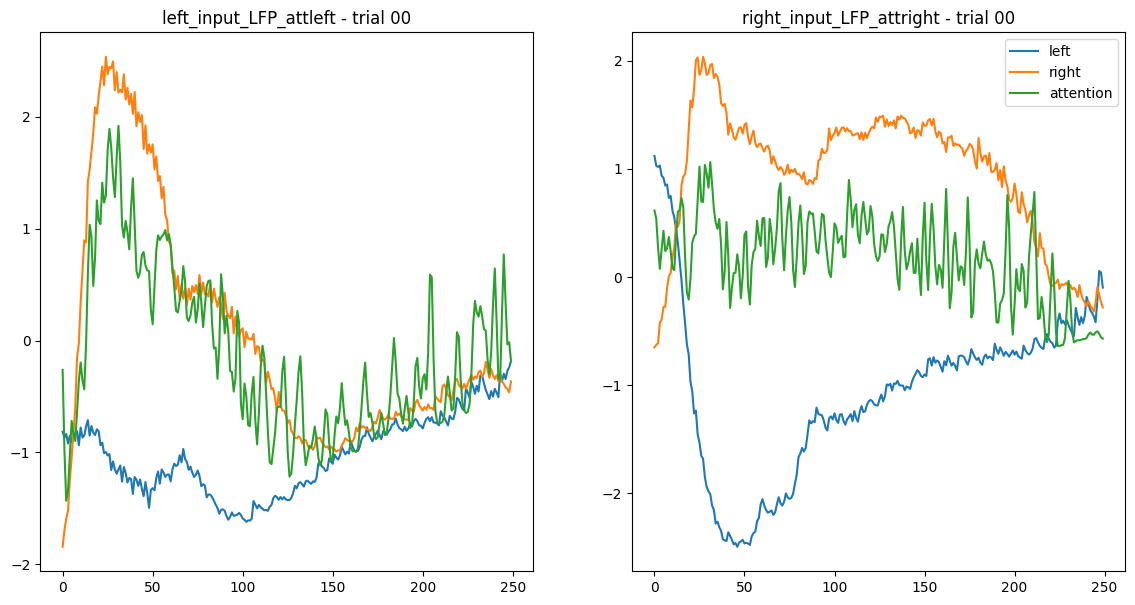

Dataset 1 complete in 20.52887487411499
Dataset 2 loaded in 5.94 seconds
[ 0  6  9 10 11 12 13 14 17 19]
[ 1  2  3  4  5  7  8 15 16 18]
attentions shape  (250,)


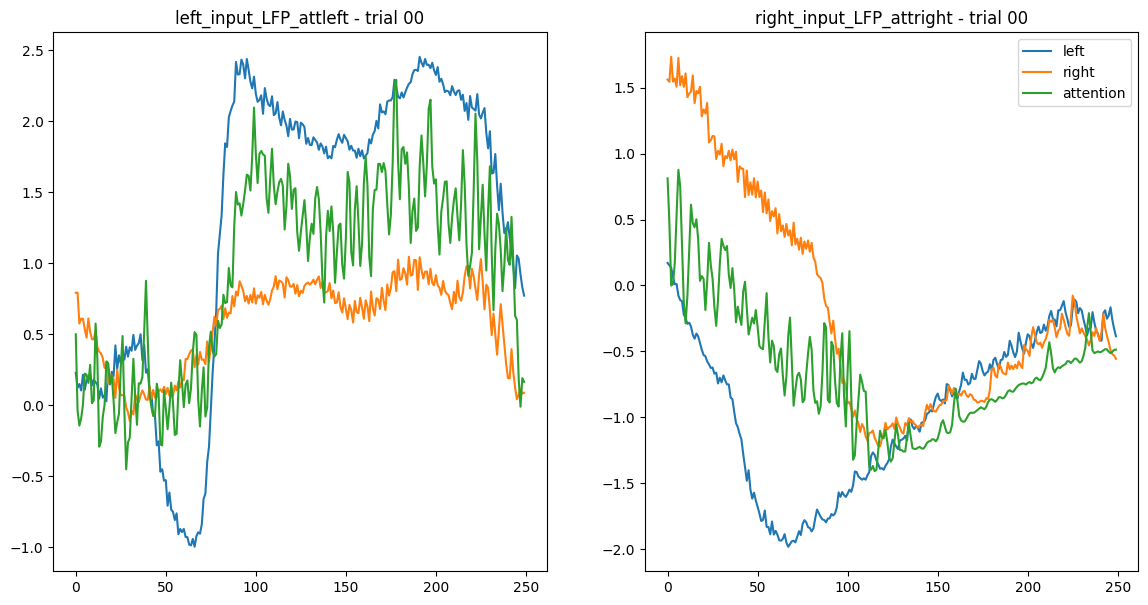

Dataset 2 complete in 7.079168796539307
Dataset 4 loaded in 5.35 seconds
[ 0  2  4  5  6  7 10 13 15 16]
[ 1  3  8  9 11 12 14 20 23 24]
attentions shape  (250,)


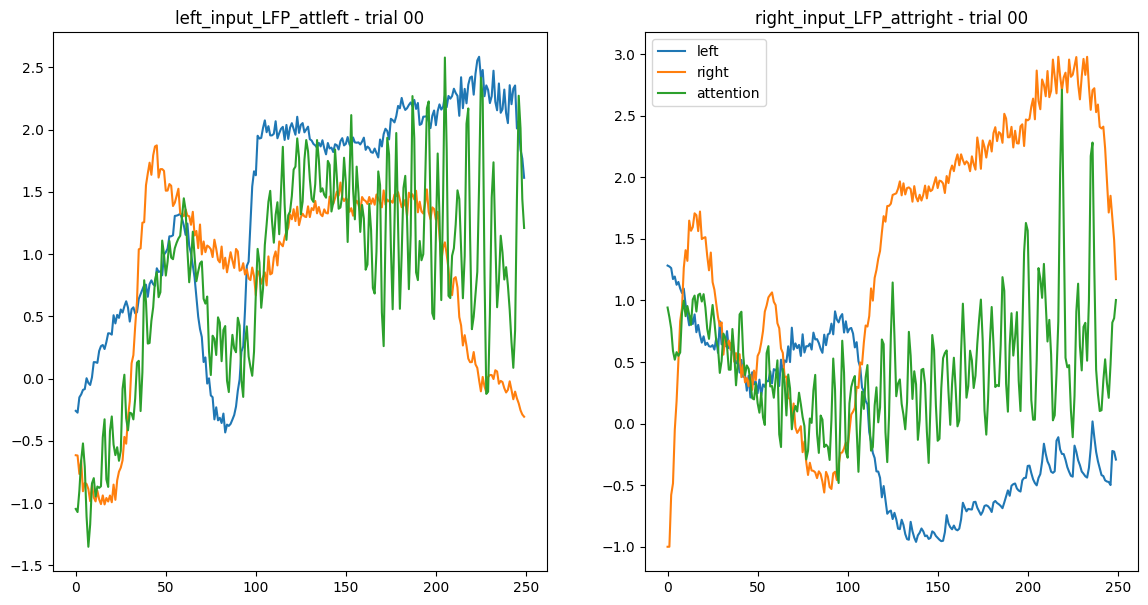

Dataset 4 complete in 6.510895252227783
Dataset 8 loaded in 5.73 seconds
[ 0  6  7  8  9 12 13 14 15 17]
[ 1  2  3  4  5 10 11 16 18 20]
attentions shape  (250,)


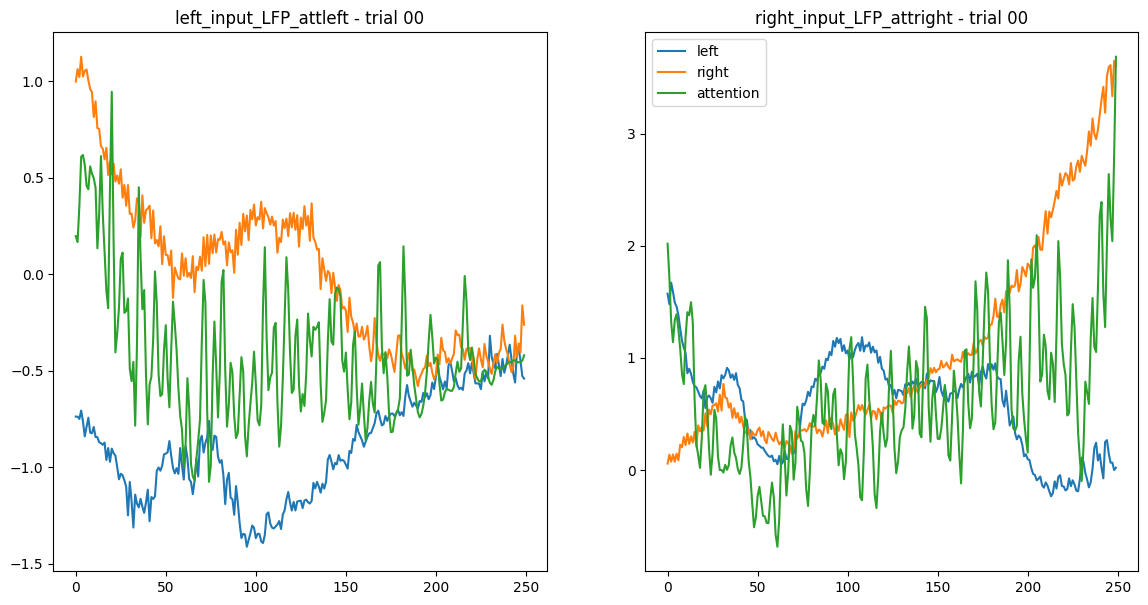

Dataset 8 complete in 6.8146631717681885
Dataset 14 loaded in 5.13 seconds
[ 2  3  5  6  9 11 12 13 14 15]
[ 0  1  4  7  8 10 16 17 19 20]
attentions shape  (250,)


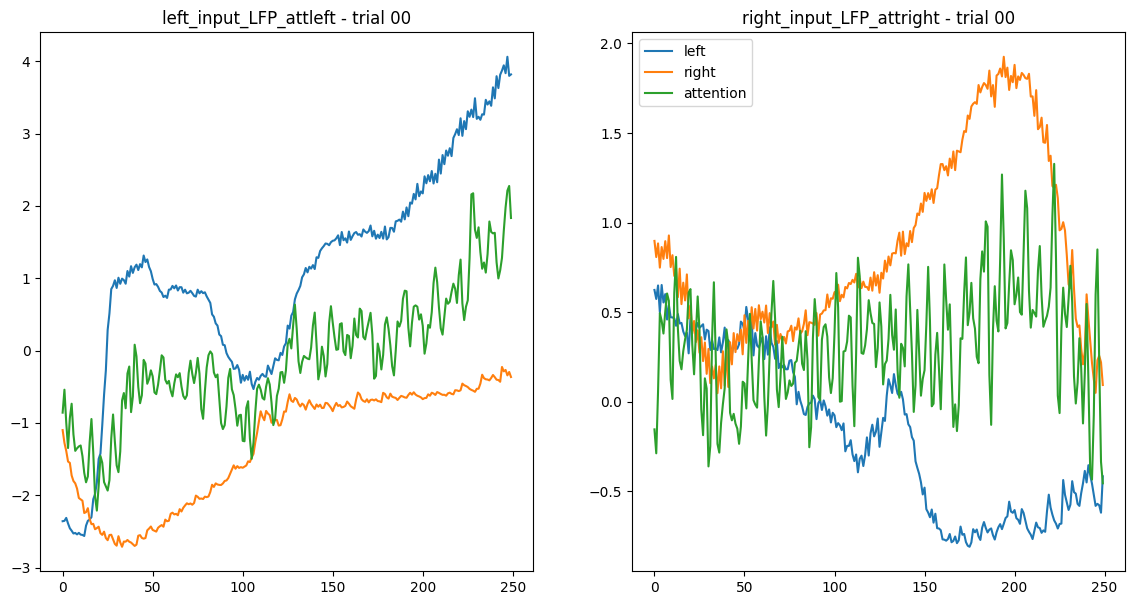

Dataset 14 complete in 6.121541261672974
Dataset 15 loaded in 5.33 seconds
[ 0  1  2  4  6  8  9 10 12 13]
[ 3  5  7 11 15 16 17 18 19 20]
attentions shape  (250,)


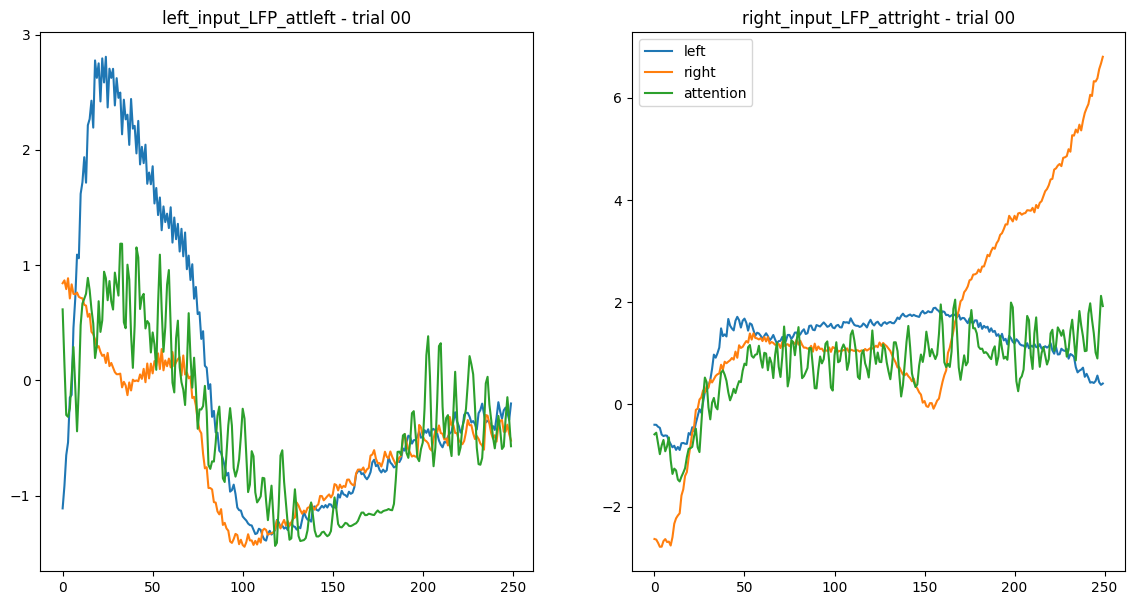

Dataset 15 complete in 6.202896356582642
Dataset 20 loaded in 5.37 seconds
[ 0  4  7 12 13 18 20 21 22 25]
[ 1  2  3  5  6  8  9 10 11 14]
attentions shape  (250,)


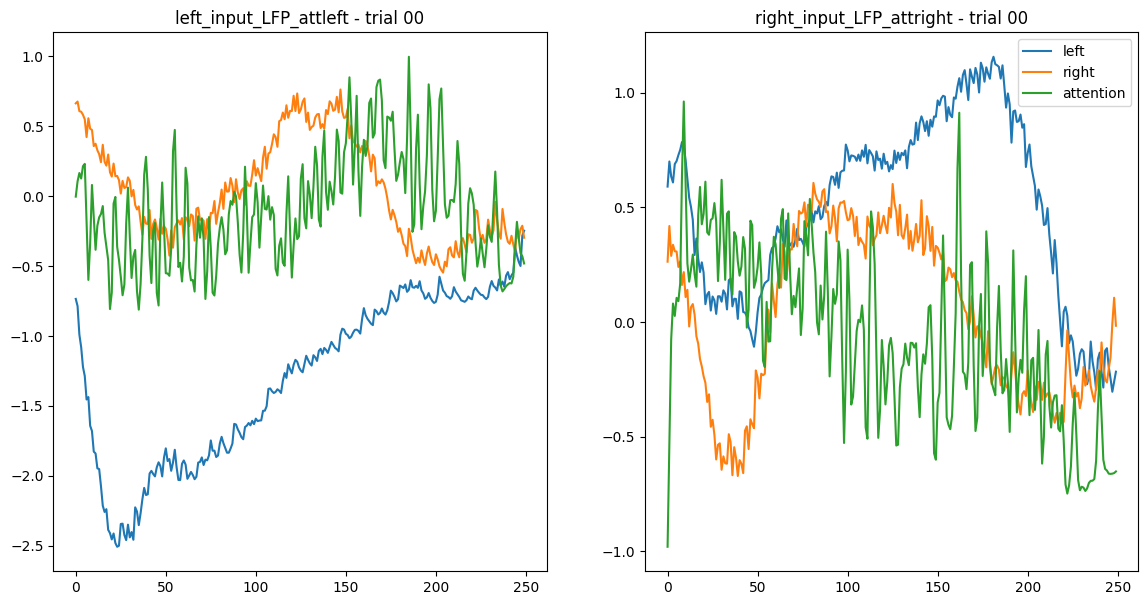

Dataset 20 complete in 6.391727924346924
Dataset 23 loaded in 4.79 seconds
[ 1  4  9 12 14 16 17 18 21 22]
[ 0  2  3  5  6  7  8 10 11 13]
attentions shape  (250,)


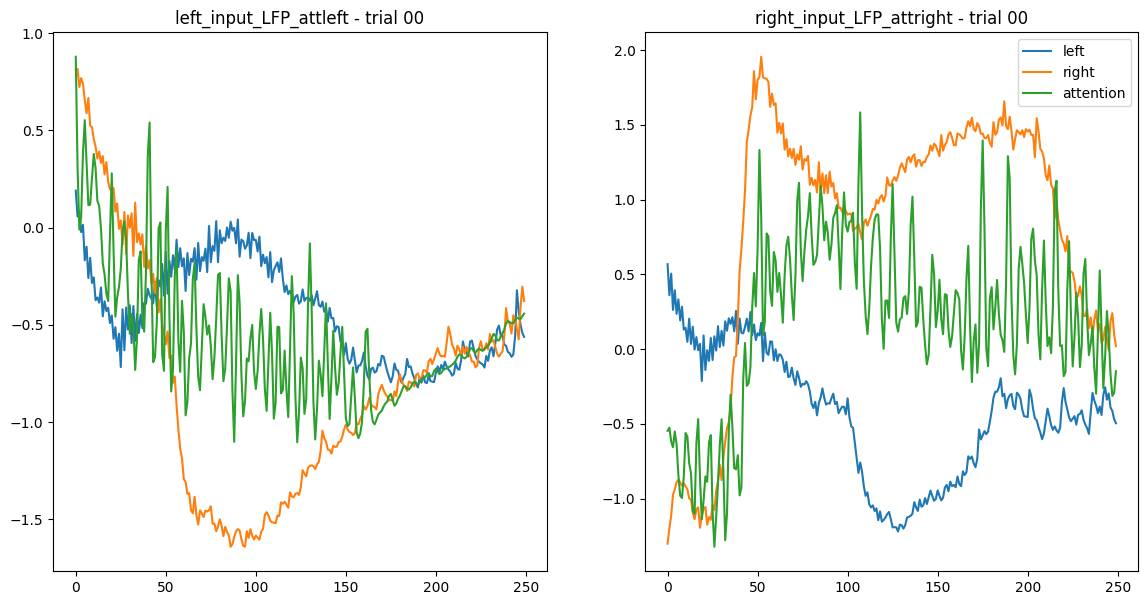

Dataset 23 complete in 5.770646810531616
total time elapsed = 65.434401512146
{'dataset_1': {'delta': {'left_attleft': np.float64(1.2320717310373843), 'right_attleft': np.float64(1.1947986161887703), 'left_attright': np.float64(1.1158264228437353), 'right_attright': np.float64(1.1525487634502833)}, 'theta': {'left_attleft': np.float64(1.1982441655064884), 'right_attleft': np.float64(1.0614154538623854), 'left_attright': np.float64(0.9764865745224041), 'right_attright': np.float64(1.0623056382572522)}, 'alpha': {'left_attleft': np.float64(1.7323652459337269), 'right_attleft': np.float64(1.9569774710168026), 'left_attright': np.float64(1.5788807414904522), 'right_attright': np.float64(2.3179161778725086)}, 'beta': {'left_attleft': np.float64(3.0372601591244512), 'right_attleft': np.float64(4.7772225053979), 'left_attright': np.float64(3.0127932229873853), 'right_attright': np.float64(4.622781758062247)}, 'gamma': {'left_attleft': np.float64(3.355210209963092), 'right_attleft': np.float64

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import time
import gc
from scipy.stats import zscore
from scipy.signal import detrend
import copy
import sys
from scipy.integrate import simpson as simps

coherence_path = r"C:\Users\joshu\nice\testcodepearsoncoherence"
sys.path.append(coherence_path)
import coherence  
from coherence import field_field_coherence


from scipy.ndimage import gaussian_filter1d

def smooth_with_gaussian(data, sigma=3):
    return gaussian_filter1d(data, sigma=sigma, axis=1) 
sigma = 2

def preprocess(data):
    data = detrend(data, axis=0)
    epsilon = 1e-9
    data = (data - np.mean(data, axis=0)) / (np.std(data, axis=0) + epsilon)
    
    return data

#making teh data structures
file_numbers = [1, 2, 4, 8, 14, 15, 20, 23]

dt = 0.002
bands = ['delta', 'theta', 'alpha', 'beta', 'gamma']   #for coherence I have looked at the mean valuee for these bands
freq_ranges = [(0, 4), (4, 8), (8, 13), (13, 30), (30, 80)]  # Actual frequency ranges

structure = {f'dataset_{file_number}': {f'{band}': {
    'left_attleft': [],
    'right_attleft': [],
    'left_attright': [],
    'right_attright': []
} for band in bands} for file_number in file_numbers} 

coherence_results = copy.deepcopy(structure)

total_time = time.time()
for file_number in  file_numbers:
    file_total = time.time()
    file_path = f'C:/Users/joshu/PartIIIProject/RSNNdale_attention_{file_number}_attention_test'
    load_data_start_time = time.time()
    data = pickle.load(open(file_path, 'rb'))
    elapsed_time = time.time() - load_data_start_time
    print(f"Dataset {file_number} loaded in {elapsed_time:.2f} seconds")

    attention_labels = data['label_attend'][0]
    label_left = data['label_left'][0]
    label_right = data['label_right'][0]
    attend_01 = data['attend'][0]
    omitted = data["omit"][0]
    relevant = np.where(omitted == 0)[0]    #indices of agg where not omitted

    left_input_LFP = preprocess(data['LFP'][0][0][relevant])
    right_input_LFP = preprocess(data['LFP'][0][1][relevant])
    attention_LFP = preprocess(data['LFP_rec'][0][2][relevant])

    left_indices_agg = np.where((omitted == 0) & (attend_01 == 0))[0]  #indices of agg where left
    left_indices = np.where(np.isin(relevant, left_indices_agg))[0]   #indices for relevant processed data where attention left
    right_indices_agg = np.where((omitted ==0) & (attend_01 == 1))[0]
    right_indices = np.where(np.isin(relevant, right_indices_agg))[0]

    print(left_indices[0:10])
    print(right_indices[0:10])
     
                
    #print(f' found data for left {class_left}, right {class_right}')
    left_input_LFP_attleft = left_input_LFP[left_indices, 100:350]   #data for attention left
    right_input_LFP_attleft = right_input_LFP[left_indices, 100:350]
    attention_LFP_attleft = attention_LFP[left_indices, 100:350]

    left_input_LFP_attright = left_input_LFP[right_indices, 100:350]   #data for attention right
    right_input_LFP_attright = right_input_LFP[right_indices, 100:350]
    attention_LFP_attright = attention_LFP[right_indices, 100:350]


    #plotting some traces-----------
    print('attentions shape ', attention_LFP_attleft[0, :].shape)
    smooth_attention_left = gaussian_filter1d(attention_LFP_attleft[0, :], sigma = 1, axis = 0)
    smooth_attention_right = gaussian_filter1d(attention_LFP_attright[0, :], sigma = 1, axis = 0)
    fig, ax = plt.subplots(1, 2, figsize=(14, 7))
    ax[0].plot(left_input_LFP_attleft[0, :], label = 'left')
    ax[0].plot(right_input_LFP_attleft[0, :], label = 'right')
    ax[0].plot(smooth_attention_left, label = 'attention')
    ax[0].set_title('left_input_LFP_attleft - trial 00')
    ax[1].plot(left_input_LFP_attright[0, :], label = 'left')
    ax[1].plot(right_input_LFP_attright[0, :], label = 'right')
    ax[1].plot(smooth_attention_right, label = 'attention')
    ax[1].set_title('right_input_LFP_attright - trial 00')
    plt.legend()
    plt.show()

    #----------------calculating coherence --------------------------------
    left_attleft_coherence, freq = field_field_coherence(
        left_input_LFP_attleft, attention_LFP_attleft, dt)
    right_attleft_coherence, freq = field_field_coherence(
        right_input_LFP_attleft, attention_LFP_attleft, dt)
    left_attright_coherence, freq = field_field_coherence(
        left_input_LFP_attright, attention_LFP_attright, dt)
    right_attright_coherence, freq = field_field_coherence(
        right_input_LFP_attright, attention_LFP_attright, dt)

    
    coh_structure = {f'{band}': [] for band in bands}
    left_attleft_coherence_bands = copy.deepcopy(coh_structure)
    right_attleft_coherence_bands = copy.deepcopy(coh_structure)
    left_attright_coherence_bands = copy.deepcopy(coh_structure)
    right_attright_coherence_bands = copy.deepcopy(coh_structure)
        
    
    for band, (f_min, f_max) in zip(bands, freq_ranges):
        band_idx = (freq >= f_min) & (freq < f_max)
        coherence_results[f'dataset_{file_number}'][band]['left_attleft'] = simps(left_attleft_coherence[band_idx], freq[band_idx])
        coherence_results[f'dataset_{file_number}'][band]['right_attleft'] = simps(right_attleft_coherence[band_idx], freq[band_idx])
        coherence_results[f'dataset_{file_number}'][band]['left_attright'] = simps(left_attright_coherence[band_idx], freq[band_idx])
        coherence_results[f'dataset_{file_number}'][band]['right_attright'] = simps(right_attright_coherence[band_idx], freq[band_idx])


    del left_input_LFP_attleft, right_input_LFP_attleft, attention_LFP_attleft, left_input_LFP_attright, right_input_LFP_attright, attention_LFP_attright
    gc.collect()
    del(data)
    gc.collect()
    print(f'Dataset {file_number} complete in', time.time() - file_total)

print('total time elapsed =', time.time() - total_time)
print(coherence_results)


[np.float64(1.1923102472438338), np.float64(1.1553125195162528), np.float64(1.3146767277279978), np.float64(1.1409643394595732), np.float64(1.2339861004668744), np.float64(1.372262261359456), np.float64(1.0185211038658444), np.float64(1.1356495127091832), np.float64(1.2024158749680705), np.float64(1.2915873160524325), np.float64(0.8332197893747152), np.float64(1.2677999277004517), np.float64(0.8633756961955761), np.float64(1.143201321257171), np.float64(1.2704344653203457), np.float64(1.2155203432277244)]
[np.float64(1.161292574562852), np.float64(1.0871317668543237), np.float64(1.3047910490480847), np.float64(1.0669541791652437), np.float64(1.2511253233777717), np.float64(1.3060655253660762), np.float64(1.0423246919114308), np.float64(1.062363950305091), np.float64(1.1630967384506934), np.float64(1.248336181745283), np.float64(0.762153007393555), np.float64(1.125419068228434), np.float64(0.8682065404221159), np.float64(1.090873935113069), np.float64(1.195824222035713), np.float64(1.17

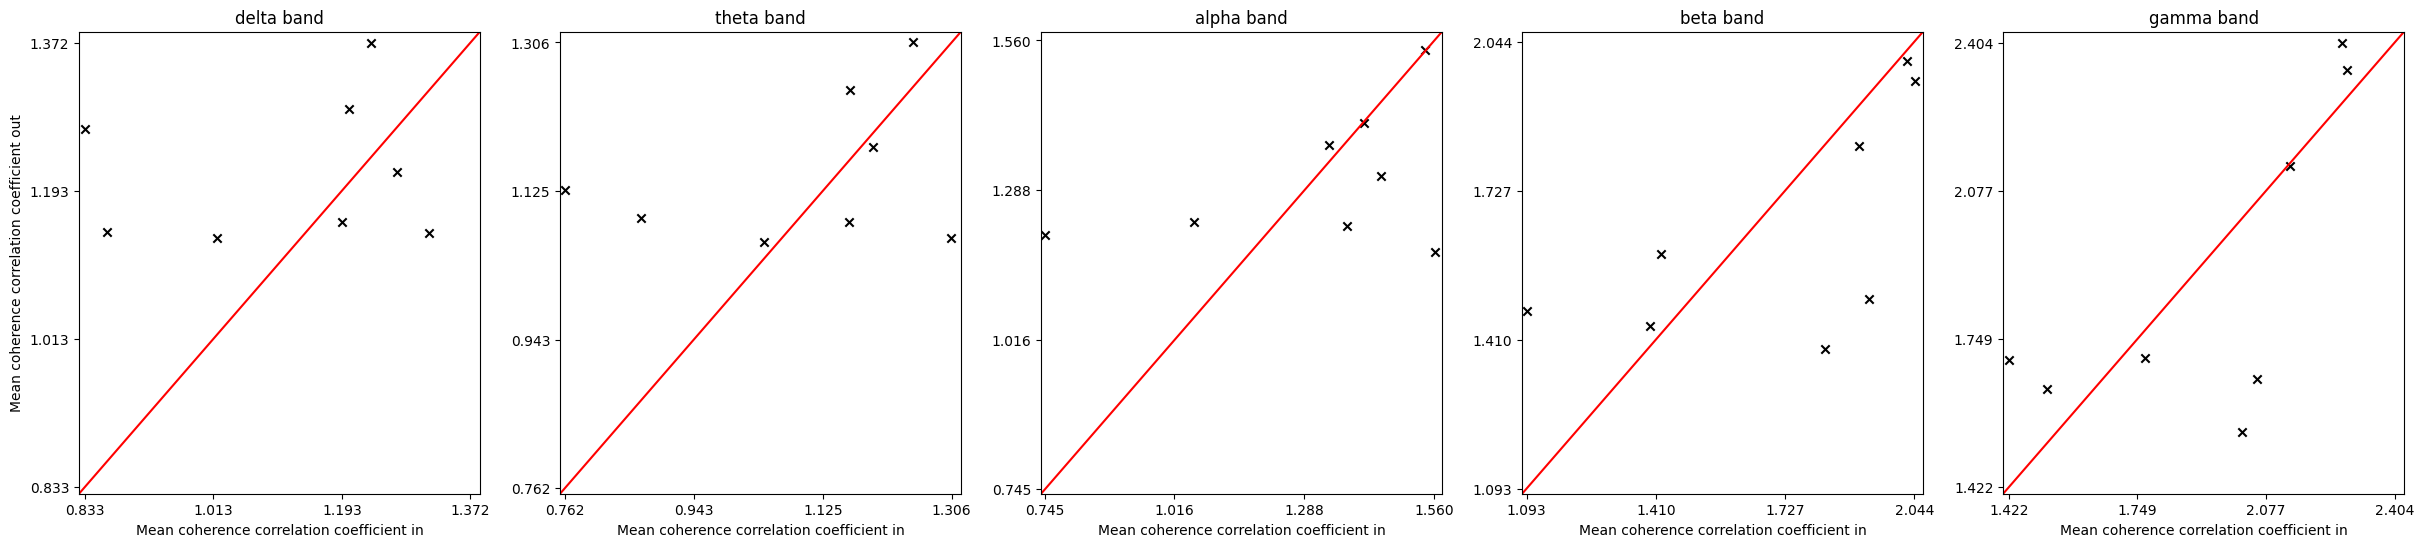

In [18]:

#want a single plot, where for each dataset, mean coherence in and mean coherence out are plotted with error bars
coherence_in = {f'{band}': [] for band in bands}
coherence_out = {f'{band}': [] for band in bands}

for file_number in file_numbers:
    values = []
    errors = []
    for band in bands:
        for condition in ['left_attleft', 'right_attright']:
            values.append(coherence_results[f'dataset_{file_number}'][band][condition])
        coherence_in[f'{band}'].append(np.mean(values))



    values = []
    errors = []
    for band in bands:
        for condition in ['left_attright', 'right_attleft']:
            values.append(coherence_results[f'dataset_{file_number}'][band][condition])
        coherence_out[f'{band}'].append(np.mean(values))
    
max_values = {f'{band}': [] for band in bands}
min_values = {f'{band}': [] for band in bands}

idx = np.arange(len(file_numbers))
for band in bands:
    values = []
    for f in idx:
        values.append(coherence_in[f'{band}'][f])
        values.append(coherence_out[f'{band}'][f])
    print(values)
    max_values[f'{band}'].append(max(values))
    min_values[f'{band}'].append(min(values))

print(max_values)

fig, axs = plt.subplots(1,5, figsize=(30, 6))
for i, band in enumerate(bands):
    axs[i].scatter(coherence_in[f'{band}'], coherence_out[f'{band}'], marker='x', color='k')
    axs[i].plot([0, 1], [0, 1], transform=axs[i].transAxes, color='r')
    axs[i].set_xlim(min_values[f'{band}'][0]*(0.99), max_values[f'{band}'][0]*(1.01))
    axs[i].set_ylim(min_values[f'{band}'][0]*(0.99), max_values[f'{band}'][0]*(1.01))
    axs[i].set_xticks(np.round(np.linspace(min_values[f'{band}'][0],max_values[f'{band}'][0], 4), 3))
    axs[i].set_yticks(np.round(np.linspace(min_values[f'{band}'][0],max_values[f'{band}'][0], 4), 3))
    axs[i].set_xlabel('Mean coherence correlation coefficient in')
    axs[0].set_ylabel('Mean coherence correlation coefficient out')
    axs[i].set_title(f'{band} band')
plt.show()
